<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/NN_%E5%9B%9E%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lift model

模型架構圖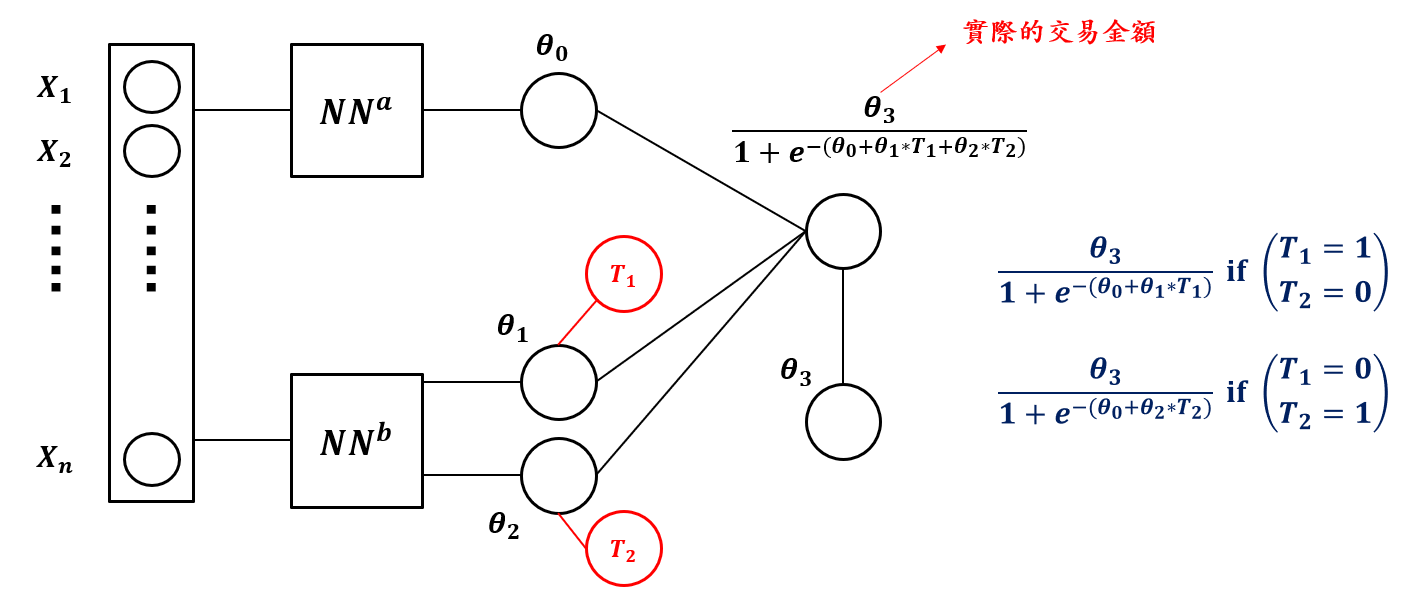

In [15]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202312_1.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/Sinopac/train_202402.csv')
df = pd.read_csv('/content/data202312_1.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,19012621YA8,58,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
1,19039293TA8,59,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
2,19042120PA8,54,0,1.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
3,19052324OK8,60,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
4,19052578MU0,60,0,1.0,0,1000.0,1,0,0,3,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076646,Z2229999030,80,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,0,0,0
1076647,Z2422221010,47,0,2.0,0,1440.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1076648,Z2422273090,57,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
1076649,Z2794749990,56,0,2.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0


In [28]:
df.select_dtypes(include=['object']).columns

Index(['UNINO'], dtype='object')

In [55]:
binary_columns = []

for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) <= 2 and (0 in unique_values or 1 in unique_values):
        binary_columns.append(column)

print("Columns with binary values:")
print(binary_columns)
print(len(binary_columns)) #69

# Convert columns to object data type
df[binary_columns] = df[binary_columns].astype('int64')

Columns with binary values:
['公司戶記號', '呆帳記號_含信用卡', '網路會員記號', '網路使用記號', '薪轉戶記號', '銀行靜止戶記號', '停滯戶記號', '催收記號_不含信用卡', '上市櫃公司員工記號', '存款記號', '信貸記號', '房貸記號', '員工記號', '金控員工記號_非銀行', '證券推介開戶記號', '數位帳戶等級記號', '換匯發送名單', '跨售行為', '近三個月是否發送過外匯名單', '近三個月是否發送過其他名單', '中小企業記號_0', '客戶行業別_住宿及餐飲業', '客戶行業別_保全業', '客戶行業別_保險業', '客戶行業別_公職人員', '客戶行業別_其他', '客戶行業別_典當業', '客戶行業別_各級學校/學術機構', '客戶行業別_外交人員', '客戶行業別_大眾傳播', '客戶行業別_學生', '客戶行業別_家管', '客戶行業別_專業人士', '客戶行業別_廣告業', '客戶行業別_建築業', '客戶行業別_批發及零售業', '客戶行業別_技術服務業', '客戶行業別_投信／投顧／證券', '客戶行業別_政府機構', '客戶行業別_政治人物／演藝人員', '客戶行業別_旅遊業', '客戶行業別_水電燃氣業', '客戶行業別_演藝人員', '客戶行業別_無業', '客戶行業別_營造業', '客戶行業別_礦石及土石採取業', '客戶行業別_社工/義工', '客戶行業別_網路拍賣', '客戶行業別_自由業', '客戶行業別_藝品或寶石交易', '客戶行業別_虛擬貨幣業', '客戶行業別_製造業', '客戶行業別_貿易買賣業', '客戶行業別_資訊業', '客戶行業別_賭博／夜總會相關行業', '客戶行業別_軍官/軍人', '客戶行業別_軍警機構', '客戶行業別_農林漁牧業', '客戶行業別_運輸或倉儲及通訊業', '客戶行業別_醫療保健', '客戶行業別_金融業', '客戶行業別_電子業', '對帳單寄送記號_0', '對帳單寄送記號_1', '對帳單寄送記號_2', '信用卡VIP客戶註記_Y', '外幣存款記號_Y', '信用卡轉呆記號_Y', '信用卡自動扣款記號_Y']
69


In [30]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

Index(['年齡', '網路使用記號_行動銀行', '小mma記號', '網路服務記號', '薪轉員工平均薪資', '放款記號', '信用卡記號',
       '信託記號', '證券記號', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月'],
      dtype='object')

In [56]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.drop(['UNINO'], axis = 1, inplace = True)
unino = test['UNINO']
test.drop(['UNINO'], axis = 1, inplace = True)
print(train.shape, test.shape)

(861320, 204) (215331, 204)


In [21]:
df[numeric_cols]

,性別,客戶年收入,融資年交易額,融資三月交易額,融資六月交易額,融資庫存市值,融資使用金額,融券庫存市值,融券使用金額,信用卡最近一個月收單手續費收入,...,基金近12個月申購次數,最近一個月刷卡筆數,最近三個月刷卡筆數,最近六個月刷卡筆數,共同行銷合作推廣_證券,證券月交易筆數,證券近一年交易筆數,證券庫存股檔數,TOTALNTAMOUNT,外匯交易金額_近三個月
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.730994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076646,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.5,0.0,0.0,0.0,0.0,0.0
1076647,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1076648,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.533333,0.46875,0.0,0.0,0.0,0.0,0.0,0.0
1076649,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.266667,0.31250,0.5,0.0,0.0,0.0,0.0,0.0


In [22]:
train.iloc[:,149].name

'換匯發送名單'

In [107]:
import torch
import torch.nn as nn
class CustomNet(nn.Module):
    def __init__(self, input_size):
        super(CustomNet, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.branch2 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )
        self.output_layer = nn.Linear(3, 1)

    def forward(self, x):
        x1 = self.feature_extractor(x)
        x2 = self.branch2(x)
        T1 = x[:, 149].unsqueeze(1)
        T2 = 1 - T1
        x2 = torch.sigmoid(x2)
        T1_multiplied = x2[:, 0].unsqueeze(1) * T1
        T2_multiplied = x2[:, 1].unsqueeze(1) * T2
        x_concat = torch.cat((x1, T1_multiplied, T2_multiplied), dim=1)
        output = torch.sigmoid(self.output_layer(x_concat))
        return output

# Example usage
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Print model architecture
print(model)

CustomNet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
  (branch2): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
train = train.astype(float)
test = test.astype(float)
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(train['跨售行為'].values, dtype=torch.float32)
X_val = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_val = torch.tensor(test['跨售行為'].values, dtype=torch.float32)
# Define the hyperparameter search space
learning_rates = [0.001, 0.01, 0.1]
weight_decays = [0.001, 0.01, 0.1]
epochs = [10, 20, 30]

best_loss = float('inf')
best_hyperparameters = {}

# Iterate over all hyperparameter combinations
for lr in learning_rates:
    for weight_decay in weight_decays:
        for num_epochs in epochs:
            # Define the model
            input_size = 202  # Number of input features
            model = CustomNet(input_size)

            if torch.cuda.is_available():
                device = torch.device("cuda")
                model = model.to(device)
                X_tensor = X_tensor.to(device)
                y_tensor = y_tensor.to(device)
                X_val = X_val.to(device)
                y_val = y_val.to(device)
            else:
                device = torch.device("cpu")

            # Define the loss function: Mean Squared Error (MSE)
            criterion = nn.BCELoss()

            # Define the optimizer
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

            # Training loop
            for epoch in range(num_epochs):
                # Forward pass
                outputs = model(X_tensor)
                loss = criterion(outputs.squeeze(), y_tensor)

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Evaluate the model on validation data
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs.squeeze(), y_val)

            # Update best hyperparameters if the current combination is better
            if val_loss < best_loss:
                best_loss = val_loss
                best_hyperparameters = {"lr": lr, "weight_decay": weight_decay, "epochs": num_epochs}

# Train the final model using the best hyperparameters
input_size = 202  # Number of input features
model = CustomNet(input_size)
if torch.cuda.is_available():
  device = torch.device("cuda")
  model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=best_hyperparameters["lr"], weight_decay=best_hyperparameters["weight_decay"])
criterion = nn.BCELoss()

for epoch in range(best_hyperparameters["epochs"]):
    # Forward pass
    outputs = model(X_tensor)

    loss = criterion(outputs.squeeze(), y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'lr': 0.1, 'weight_decay': 0.001, 'epochs': 30}


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

# If you have labels (target variable) in your DataFrame, you can separate them
# For example, if the last column is the target variable
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_tensor = torch.tensor(train['跨售行為'].values)  # Last column as the target variable

# Define the model
input_size = 202 # Number of input features including T1
model = CustomNet(input_size)

if torch.cuda.is_available():
    device = torch.device("cuda")
    model = model.to(device)
    X_tensor = X_tensor.to(device)
    y_tensor = y_tensor.to(device)
else:
    device = torch.device("cpu")

# Define the loss function #Binary Cross Entropy Loss
criterion = nn.BCELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.001)

# Training loop
num_epochs = 10000  # Number of epochs
desired_loss = 0.005  # Desired loss threshold

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor.float())  # Convert T1_train to float

    # Compute loss

    loss = criterion(outputs.squeeze(), y_tensor.float()).cuda()  # Ensure y_tensor is of float type

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Check if the loss is below the desired threshold
    if loss.item() < desired_loss:
        print(f'Loss reached the desired threshold of {desired_loss}. Stopping training...')
        break

串流輸出內容已截斷至最後 5000 行。
Epoch [5001/10000], Loss: 0.0106
Epoch [5002/10000], Loss: 0.0106
Epoch [5003/10000], Loss: 0.0106
Epoch [5004/10000], Loss: 0.0106
Epoch [5005/10000], Loss: 0.0106
Epoch [5006/10000], Loss: 0.0106
Epoch [5007/10000], Loss: 0.0106
Epoch [5008/10000], Loss: 0.0106
Epoch [5009/10000], Loss: 0.0106
Epoch [5010/10000], Loss: 0.0106
Epoch [5011/10000], Loss: 0.0106
Epoch [5012/10000], Loss: 0.0106
Epoch [5013/10000], Loss: 0.0106
Epoch [5014/10000], Loss: 0.0106
Epoch [5015/10000], Loss: 0.0106
Epoch [5016/10000], Loss: 0.0106
Epoch [5017/10000], Loss: 0.0106
Epoch [5018/10000], Loss: 0.0106
Epoch [5019/10000], Loss: 0.0106
Epoch [5020/10000], Loss: 0.0106
Epoch [5021/10000], Loss: 0.0106
Epoch [5022/10000], Loss: 0.0106
Epoch [5023/10000], Loss: 0.0106
Epoch [5024/10000], Loss: 0.0106
Epoch [5025/10000], Loss: 0.0106
Epoch [5026/10000], Loss: 0.0106
Epoch [5027/10000], Loss: 0.0106
Epoch [5028/10000], Loss: 0.0106
Epoch [5029/10000], Loss: 0.0106
Epoch [5030/10000], Lo

In [26]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/Model/NN_202312_回測.pth')

In [58]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_202312_回測.pth'))

<All keys matched successfully>

In [62]:
test.iloc[:,149] = 1

In [63]:
# Validation
# Assuming you have your test input data X_test in a tensor
#test_data = torch.tensor(test.values, dtype=torch.float32)

X_test = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_test = torch.tensor(test['跨售行為'].values)  # Last column as the target variable

if torch.cuda.is_available():
    device = torch.device("cuda")
    model = model.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)
else:
    device = torch.device("cpu")

criterion = nn.BCELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_test.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_test.float())
print("Test Loss:", loss_test.item())

Predictions: [[1.4174228e-03]
 [1.9420848e-05]
 [1.6928229e-03]
 ...
 [4.5969221e-04]
 [1.6004287e-03]
 [3.5304527e-04]]
Test Loss: 0.010456976480782032


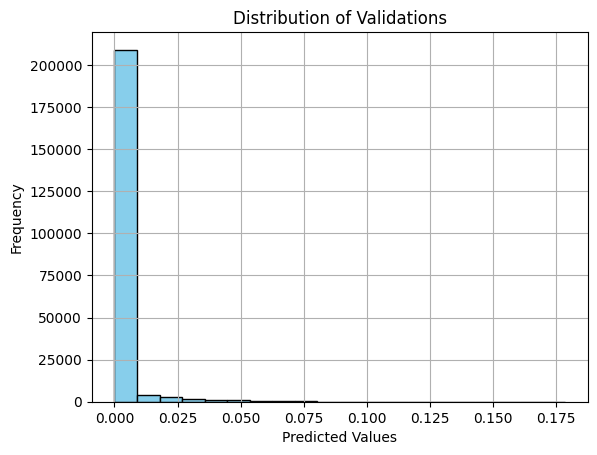

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Validations')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [41]:
val = pd.DataFrame(unino)
df = pd.read_csv('/content/data202312_1.csv')
train, test = train_test_split(df, test_size=0.2, random_state=42)
val = pd.concat([val, test[['換匯發送名單', '換匯基因標籤', '跨售行為', 'TOTALNTAMOUNT']]], axis = 1)
val.reset_index(drop=True, inplace=True)
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT
0,Q1777369550,0,90.0365,0,0
1,M1771565510,0,49.1271,0,0
2,R1771843010,0,78.2486,0,0
3,N2729518770,0,73.6882,0,0
4,F1745627350,0,57.3852,0,0
...,...,...,...,...,...
215326,V2795576720,0,69.4419,0,0
215327,B1790155350,0,48.7207,0,0
215328,A1789611970,0,56.3578,0,0
215329,F2755817950,0,93.9032,0,0


In [34]:
val.describe()

,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN
count,43760.000000,43760.000000,43760.000000,4.376000e+04,218591.000000,218591.000000,218591.000000
mean,0.049680,73.582267,0.002262,2.497262e+02,0.002808,0.003462,0.000654
std,0.217286,15.236843,0.047511,1.337694e+04,0.007354,0.008870,0.001519
min,0.000000,0.162600,0.000000,0.000000e+00,0.000005,0.000007,0.000001
25%,0.000000,61.042525,0.000000,0.000000e+00,0.000428,0.000541,0.000113
50%,0.000000,75.986950,0.000000,0.000000e+00,0.000997,0.001259,0.000262
75%,0.000000,86.060425,0.000000,0.000000e+00,0.001829,0.002310,0.000481
max,1.000000,99.986400,1.000000,1.917780e+06,0.139003,0.162775,0.023772


In [64]:
#val['Lift_NN|T = 0'] = predictions_np
val['Lift_NN|T = 1'] = predictions_np
val['Lift_NN'] = val['Lift_NN|T = 1'] - val['Lift_NN|T = 0']
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN
0,Q1777369550,0,90.0365,0,0,0.000933,0.001417,0.000484
1,M1771565510,0,49.1271,0,0,0.000012,0.000019,0.000007
2,R1771843010,0,78.2486,0,0,0.001120,0.001693,0.000573
3,N2729518770,0,73.6882,0,0,0.000019,0.000030,0.000011
4,F1745627350,0,57.3852,0,0,0.000392,0.000599,0.000207
...,...,...,...,...,...,...,...,...
215326,V2795576720,0,69.4419,0,0,0.000647,0.000980,0.000333
215327,B1790155350,0,48.7207,0,0,0.000784,0.001174,0.000391
215328,A1789611970,0,56.3578,0,0,0.000301,0.000460,0.000159
215329,F2755817950,0,93.9032,0,0,0.001053,0.001600,0.000548


In [65]:
#val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202401_results.csv')
#val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202401_回測.csv')
val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202312_回測.csv')

In [66]:
!pip install scikit-uplift

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.6 MB/s eta 0:00:00


In [67]:
!pip install plotly

In [68]:
import numpy as np
import pandas as pd
#import causalml
import random

%matplotlib inline
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift

In [69]:
from sklift.metrics import uplift_by_percentile
val['跨售行為'] = [0 if x == -1 else x for x in val['跨售行為']]
val[['跨售行為', '換匯發送名單']].astype(int)
uplift_by_perc_df =  uplift_by_percentile(
    val["跨售行為"],
    val["Lift_NN"],
    val["換匯發送名單"],
    strategy="overall",
    total=False,
    std=True,
    bins=10
)

uplift_by_perc_df

,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,3015,18519,0.024212,0.014580,0.009633,0.002799,0.000881,0.002935
10-20,981,20552,0.004077,0.001070,0.003007,0.002035,0.000228,0.002047
20-30,949,20584,0.000000,0.000534,-0.000534,0.000000,0.000161,0.000161
30-40,854,20679,0.002342,0.000339,0.002003,0.001654,0.000128,0.001659
40-50,708,20825,0.000000,0.000192,-0.000192,0.000000,0.000096,0.000096
50-60,579,20954,0.000000,0.000143,-0.000143,0.000000,0.000083,0.000083
60-70,424,21109,0.000000,0.000237,-0.000237,0.000000,0.000106,0.000106
70-80,237,21296,0.000000,0.000235,-0.000235,0.000000,0.000105,0.000105
80-90,245,21288,0.000000,0.000047,-0.000047,0.000000,0.000047,0.000047


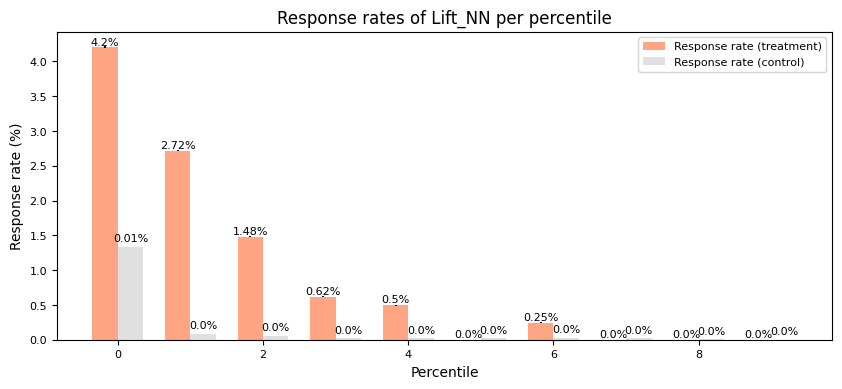

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklift.metrics import uplift_by_percentile

def plot_uplift_by_percentile(df, metric_column, bins=10):
    df['跨售行為'] = [0 if x == -1 else x for x in df['跨售行為']]

    # Fill NaN values in the metric_column with a specific value (e.g., 0)
    df[metric_column].fillna(0, inplace=True)

    uplift_by_perc_df = uplift_by_percentile(
        df["跨售行為"],
        df[metric_column],
        df["換匯發送名單"],
        strategy="by_group",
        total=False,
        std=True,
        bins=bins
    )

    fig, ax2 = plt.subplots(1, 1, figsize=(10, 4))
    #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    '''
    # Plot the first graph (Uplift)
    bars1 = ax1.bar(
        uplift_by_perc_df.index,
        uplift_by_perc_df.uplift,
        yerr=uplift_by_perc_df.std_uplift * 2,
        color='coral',
        alpha=0.7
    )

    ax1.set_title(f'Uplift of {metric_column} per percentile', fontsize=12)
    ax1.set_ylabel('Uplift (%)', fontsize=10)

    # Adding smaller text labels on each bar for Uplift
    for bar, label in zip(bars1, uplift_by_perc_df.uplift):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f'{round(label * 100)}%', ha='center', va='bottom', fontsize=8)
        else:
            ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.006, 'NaN', ha='center', va='bottom', fontsize=8)'''

    # Plot the second graph (Response Rates for Treatment and Control)
    bar_width = 0.35
    index = np.arange(len(uplift_by_perc_df.index))

    bars2_treatment = ax2.bar(
        index - bar_width/2,
        uplift_by_perc_df.response_rate_treatment * 100,
        bar_width,
        label="Response rate (treatment)",
        color='coral',
        yerr=uplift_by_perc_df.std_treatment * 2,
        alpha=0.7
    )

    bars2_control = ax2.bar(
        index + bar_width/2,
        uplift_by_perc_df.response_rate_control * 100,
        bar_width,
        label="Response rate (control)",
        color='lightgrey',
        yerr=uplift_by_perc_df.std_control * 2,
        alpha=0.7
    )

    ax2.set_title(f'Response rates of {metric_column} per percentile', fontsize=12)
    ax2.set_xlabel('Percentile', fontsize=10)
    ax2.set_ylabel('Response rate (%)', fontsize=10)
    ax2.legend(fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Treatment)
    for bar, label in zip(bars2_treatment, uplift_by_perc_df.response_rate_treatment * 100):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.006, f'{round(label,2)}%', ha='center', va='bottom', fontsize=8)
        else:
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.006, 'NaN', ha='center', va='bottom', fontsize=8)
    # Adding smaller text labels on each bar for Response Rates (Control)
    for bar, label in zip(bars2_control, uplift_by_perc_df.response_rate_control ):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{round(label,2)}%', ha='center', va='bottom', fontsize=8)

    # Set smaller font size for tick labels
    ax2.tick_params(axis='both', which='major', labelsize=8)

    # Ensure that the y-axis starts from 0
    ax2.set_ylim(bottom=0)

    plt.show()

# Usage example for 'Uplift_mean' column
plot_uplift_by_percentile(val, 'Lift_NN')

In [71]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
 

In [72]:
from causalml.metrics import plot_gain, get_cumgain
T = val
T =T[['換匯發送名單', '跨售行為',	'Lift_NN']]
cumgain = get_cumgain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=True, random_seed=42)
cumgain

,Lift_NN,Random
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
215327,0.999978,0.999978
215328,0.999983,0.999983
215329,0.999989,0.999989
215330,0.999994,0.999994


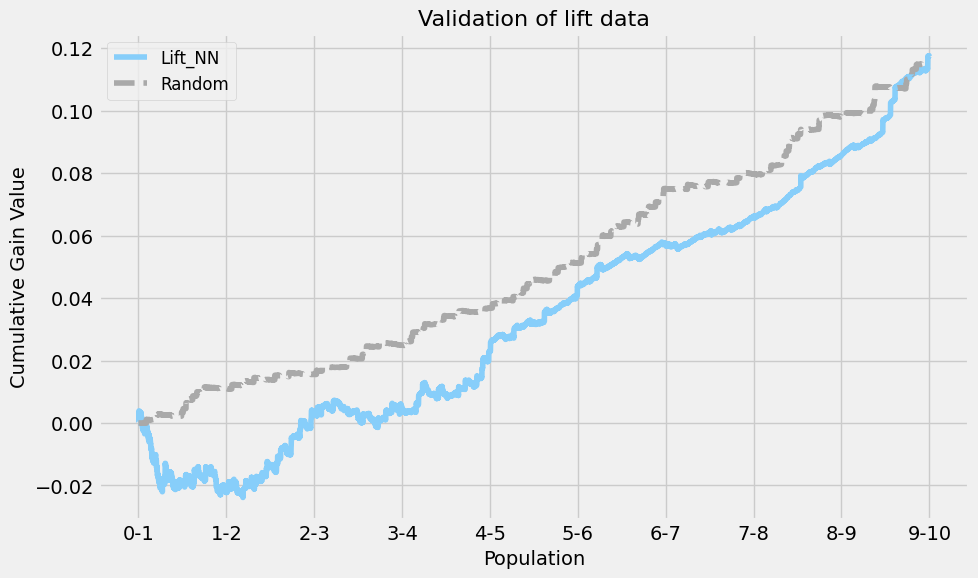

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already imported pandas as pd and have the necessary dataframes

#df = pd.concat([cumgain, cumgain_1['Gi']], axis=1)
#df = cumgain
df = cumgain[:len(cumgain)//10]
x = df.index

# Define the ranges for the x-axis labels
ranges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
#ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Resample x to have 11 evenly spaced points
x_resampled = np.linspace(0, len(x) - 1, 10, dtype=int)

# Plotting the lines with customizations
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.plot(x, df['Lift_NN'], label='Lift_NN', color='lightskyblue')  # Set color and line width
plt.plot(x, df['Random'], label='Random', color='darkgray', linestyle='--')  # Set color and marker

# Adding labels, title, and legend with custom text size
plt.xlabel('Population', fontsize=14)  # Set x-axis label with custom text size
plt.ylabel('Cumulative Gain Value', fontsize=14)  # Set y-axis label with custom text size
plt.title('Validation of lift data', fontsize=16)  # Set title with custom text size
plt.legend(fontsize=12)  # Set legend with custom text size

# Setting x-axis ticks and labels
plt.xticks(x_resampled, ranges)

# Displaying the plot
plt.show()

### Predictions

In [103]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/Sinopac/train_202402.csv')
df = pd.read_csv('/content/data202401.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,F2593340910,18,0,2.0,0,120.0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,F2593358270,19,0,2.0,0,0.0,1,2,0,3,...,0,0,0,0,0,1,0,0,0,0
2,F2593378680,19,0,2.0,0,50.0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0
3,F2593397620,19,0,2.0,0,0.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
4,F2598703540,17,0,2.0,0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,50,0,1.0,0,600.0,1,3,0,1,...,0,0,0,1,0,0,0,1,0,1
1092947,Y2729592620,60,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1092948,Z1222367980,47,0,1.0,0,420.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1092949,Z1222472300,30,0,1.0,0,550.0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [105]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
#df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

In [106]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.drop(['UNINO'], axis = 1, inplace = True)
print(df.shape)

(1092951, 204)


In [108]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_202312_回測.pth'))
model.eval()  # Set the model to evaluation mode

CustomNet(
  (feature_extractor): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
  (branch2): Sequential(
    (0): Linear(in_features=202, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (output_layer): Linear(in_features=3, out_features=1, bias=True)
)

In [112]:
#T1 = pi01
#Treatment = 1
df.iloc[:, 149] = 1
#print(df.iloc[:, 149])
df.iloc[:, 149]

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1092946    1.0
1092947    1.0
1092948    1.0
1092949    1.0
1092950    1.0
Name: 換匯發送名單, Length: 1092951, dtype: float64

In [113]:
#202402
df = df.astype(float)
X_pred = torch.tensor(df.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_pred = torch.tensor(df['跨售行為'].values)  # Last column as the target variable

criterion = nn.BCELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_pred.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_pred.float())
print("Test Loss:", loss_test.item())

Predictions: [[0.00898311]
 [0.00034693]
 [0.00014428]
 ...
 [0.0025794 ]
 [0.00190188]
 [0.00125458]]
Test Loss: 0.01468348316848278


In [ ]:
import numpy as np

# Assuming predictions_np is your NumPy array
mean = np.mean(predictions_np)
median = np.median(predictions_np)
std_dev = np.std(predictions_np)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 0.0021021934
Median: 0.001752294
Standard Deviation: 0.0018196108


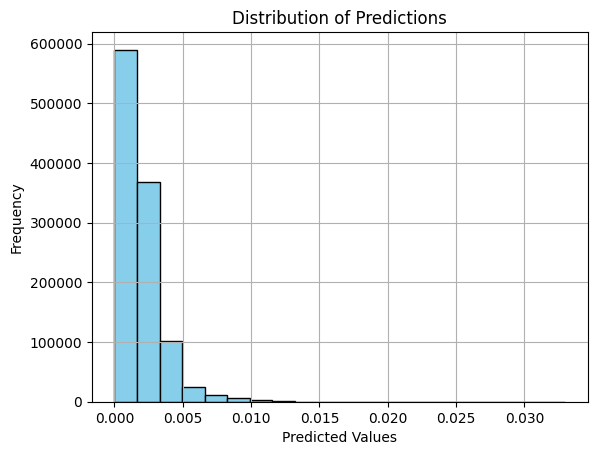

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [114]:
import pandas as pd
#res = pd.read_csv('/content/data202401.csv', usecols=['UNINO', '換匯基因標籤', '換匯發送名單','TOTALNTAMOUNT', '跨售行為'])
#res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv', index_col = 0)
#res['NN_lift_T=0'] = predictions_np
res['NN_lift_T=1'] = predictions_np
res['NN_lift'] = res['NN_lift_T=1']-res['NN_lift_T=0']
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift
0,F2593340910,75.7095,0,0,0,0.006040,0.008983,0.002943
1,F2593358270,84.0338,0,0,0,0.000226,0.000347,0.000121
2,F2593378680,73.1411,0,0,0,0.000094,0.000144,0.000051
3,F2593397620,72.0423,0,0,0,0.000685,0.001041,0.000356
4,F2598703540,75.5019,0,0,0,0.001656,0.002481,0.000825
...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.1841,0,0,0,0.007956,0.011932,0.003976
1092947,Y2729592620,96.3283,0,0,0,0.006426,0.009671,0.003245
1092948,Z1222367980,82.3242,0,0,0,0.001709,0.002579,0.000870
1092949,Z1222472300,89.6383,0,0,0,0.001262,0.001902,0.000640


In [115]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv')
#1103740 rows × 6 columns

## Value


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data202312_1.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,19012621YA8,58,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
1,19039293TA8,59,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
2,19042120PA8,54,0,1.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
3,19052324OK8,60,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
4,19052578MU0,60,0,1.0,0,1000.0,1,0,0,3,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076646,Z2229999030,80,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,0,0,0
1076647,Z2422221010,47,0,2.0,0,1440.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1076648,Z2422273090,57,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
1076649,Z2794749990,56,0,2.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0


In [96]:
df['TOTALNTAMOUNT'].describe()

count    1.092951e+06
mean     2.506376e+02
std      1.224126e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.189400e+06
Name: TOTALNTAMOUNT, dtype: float64

In [76]:
df.select_dtypes(include=['object']).columns

Index(['UNINO'], dtype='object')

In [77]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
#df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

In [78]:
min_val = df['TOTALNTAMOUNT'].min()
max_val = df['TOTALNTAMOUNT'].max()
print(min_val, max_val)

0 3259969


In [79]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

train, test = train_test_split(df, test_size=0.2, random_state=42)
train.drop(['UNINO'], axis = 1, inplace = True)
unino = test['UNINO']
test.drop(['UNINO'], axis = 1, inplace = True)
print(train.shape, test.shape)

(861320, 204) (215331, 204)


In [63]:
train.iloc[:,149].name

'換匯發送名單'

In [119]:
import torch
import torch.nn as nn

class MultiplyByTheta(nn.Module):
    def __init__(self, output_features):
        super(MultiplyByTheta, self).__init__()
        # Initialize theta as a parameter with 1.0 as its initial value
        # This assumes theta is a scalar. Adjust the size for vector outputs.
        self.theta = nn.Parameter(torch.ones(output_features))

    def forward(self, x):
        # Multiply input by theta
        return x * self.theta

class CustomNet(nn.Module):
    def __init__(self, input_size):
        super(CustomNet, self).__init__()
        # Branch 1
        self.fc1_branch1 = nn.Linear(input_size, 128)
        self.bn1_branch1 = nn.BatchNorm1d(128)  # Add batch normalization
        self.relu1_branch1 = nn.ReLU()
        self.fc2_branch1 = nn.Linear(128, 1)

        # Branch 2
        self.fc1_branch2 = nn.Linear(input_size, 128)
        self.bn1_branch2 = nn.BatchNorm1d(128)  # Add batch normalization
        self.relu1_branch2 = nn.ReLU()
        self.fc2_branch2 = nn.Linear(128, 2)

        # Hidden layer
        #self.fc_hidden = nn.Linear(3, 64)

        # Output layer
        self.fc_output = nn.Linear(3, 1)

        # MultiplyByTheta module
        self.multiply_theta = MultiplyByTheta(output_features=1)

    def forward(self, x):
        # Branch 1
        x_branch1 = self.relu1_branch1(self.bn1_branch1(self.fc1_branch1(x)))
        x_branch1 = self.fc2_branch1(x_branch1)

        # Branch 2
        x_branch2 = self.relu1_branch2(self.bn1_branch2(self.fc1_branch2(x)))
        T1 = x[:, 149].unsqueeze(1)
        T2 = 1 - T1
        x_branch2 = torch.sigmoid(x_branch2)  # Apply sigmoid activation before element-wise multiplication
        T1_multiplied = x_branch2[:, 0].unsqueeze(1) * T1
        T2_multiplied = x_branch2[:, 1].unsqueeze(1) * T2

        # Concatenate both branches
        x_concat = torch.cat((x_branch1, T1_multiplied, T2_multiplied), dim=1)

        # Hidden layer
        #x_hidden = torch.sigmoid(self.fc_hidden(x_concat))

        # Output layer
        output = torch.sigmoid(self.fc_output(x_concat))

        # Multiply by theta
        output = self.multiply_theta(output)

        return output

# Example usage
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Print model architecture
print(model)

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
  (multiply_theta): MultiplyByTheta()
)


In [82]:
# Check if GPU is available and move model to GPU
if torch.cuda.is_available():
    model = model.cuda()

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
train = train.astype(float)
test = test.astype(float)
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(train['TOTALNTAMOUNT'].values, dtype=torch.float32)
X_val = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_val = torch.tensor(test['TOTALNTAMOUNT'].values, dtype=torch.float32)
# Define the hyperparameter search space
learning_rates = [0.001, 0.01, 0.1]
weight_decays = [0.001, 0.01, 0.1]
epochs = [10, 20, 30]

best_loss = float('inf')
best_hyperparameters = {}

# Iterate over all hyperparameter combinations
for lr in learning_rates:
    for weight_decay in weight_decays:
        for num_epochs in epochs:
            # Define the model
            input_size = 202  # Number of input features
            model = CustomNet(input_size)

            if torch.cuda.is_available():
                device = torch.device("cuda")
                model = model.to(device)
                X_tensor = X_tensor.to(device)
                y_tensor = y_tensor.to(device)
                X_val = X_val.to(device)
                y_val = y_val.to(device)
            else:
                device = torch.device("cpu")

            # Define the loss function: Mean Squared Error (MSE)
            criterion = nn.MSELoss()

            # Define the optimizer
            optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

            # Training loop
            for epoch in range(num_epochs):
                # Forward pass
                outputs = model(X_tensor)
                loss = criterion(outputs.squeeze(), y_tensor)

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # Evaluate the model on validation data
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs.squeeze(), y_val)

            # Update best hyperparameters if the current combination is better
            if val_loss < best_loss:
                best_loss = val_loss
                best_hyperparameters = {"lr": lr, "weight_decay": weight_decay, "epochs": num_epochs}

# Train the final model using the best hyperparameters
input_size = 202  # Number of input features
model = CustomNet(input_size)
if torch.cuda.is_available():
  device = torch.device("cuda")
  model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=best_hyperparameters["lr"], weight_decay=best_hyperparameters["weight_decay"])
criterion = nn.MSELoss()

for epoch in range(best_hyperparameters["epochs"]):
    # Forward pass
    outputs = model(X_tensor)

    loss = criterion(outputs.squeeze(), y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Print the best hyperparameters
print("Best Hyperparameters:", best_hyperparameters)

Best Hyperparameters: {'lr': 0.1, 'weight_decay': 0.1, 'epochs': 30}


In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Assuming you have your input data X, target variable y, and theta values in tensors
train = train.astype(float)
X_tensor = torch.tensor(train.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values, dtype=torch.float32)
y_tensor = torch.tensor(train['TOTALNTAMOUNT'].values, dtype=torch.float32)

# Define the model
input_size = 202  # Number of input features
model = CustomNet(input_size)

# Define the loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(),  lr=0.1, weight_decay=0.1)
# Define the learning rate scheduler
scheduler = StepLR(optimizer, step_size=1000, gamma=0.1)  # Reduce LR by a factor of 0.1 every 1000 epochs

# Training loop
num_epochs = 300
desired_loss = 0.005

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs.squeeze(), y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Update the learning rate
    scheduler.step()

    # Print loss every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Check if the loss is below the desired threshold
    if loss.item() < desired_loss:
        print(f'Loss reached the desired threshold of {desired_loss}. Stopping training...')
        break

Epoch [1/300], Loss: 0.3082
Epoch [2/300], Loss: 0.2511
Epoch [3/300], Loss: 0.2075
Epoch [4/300], Loss: 0.1734
Epoch [5/300], Loss: 0.1464
Epoch [6/300], Loss: 0.1247
Epoch [7/300], Loss: 0.1070
Epoch [8/300], Loss: 0.0925
Epoch [9/300], Loss: 0.0804
Epoch [10/300], Loss: 0.0703
Epoch [11/300], Loss: 0.0617
Epoch [12/300], Loss: 0.0545
Epoch [13/300], Loss: 0.0482
Epoch [14/300], Loss: 0.0428
Epoch [15/300], Loss: 0.0381
Epoch [16/300], Loss: 0.0341
Epoch [17/300], Loss: 0.0305
Epoch [18/300], Loss: 0.0273
Epoch [19/300], Loss: 0.0245
Epoch [20/300], Loss: 0.0220
Epoch [21/300], Loss: 0.0198
Epoch [22/300], Loss: 0.0178
Epoch [23/300], Loss: 0.0161
Epoch [24/300], Loss: 0.0145
Epoch [25/300], Loss: 0.0131
Epoch [26/300], Loss: 0.0118
Epoch [27/300], Loss: 0.0107
Epoch [28/300], Loss: 0.0096
Epoch [29/300], Loss: 0.0087
Epoch [30/300], Loss: 0.0078
Epoch [31/300], Loss: 0.0071
Epoch [32/300], Loss: 0.0064
Epoch [33/300], Loss: 0.0058
Epoch [34/300], Loss: 0.0052
Epoch [35/300], Loss: 0

In [85]:
# Save the model
#torch.save(model.state_dict(), '/content/drive/MyDrive/Model/NN_value_202401_回測.pth')
torch.save(model.state_dict(), '/content/drive/MyDrive/Model/NN_value_202312_回測.pth')

In [91]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_value_202401_回測.pth'))
model.eval()  # Set the model to evaluation mode

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
  (multiply_theta): MultiplyByTheta()
)

In [91]:
test.iloc[:,149] = 1

In [92]:
# Prediction
# Assuming you have your test input data X_test in a tensor
#test_data = torch.tensor(test.values, dtype=torch.float32)
test = test.astype(float)
X_test = torch.tensor(test.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_test = torch.tensor(test['TOTALNTAMOUNT'].values)  # Last column as the target variable

# Define the loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_test.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_test.float())
print("Test Loss:", loss_test.item())

Predictions: [[0.07114182]
 [0.0737873 ]
 [0.07123849]
 ...
 [0.07159154]
 [0.07478197]
 [0.07422847]]
Test Loss: 0.005218879785388708


In [93]:
# Define the min and max values for each feature
#min_val = df['TOTALNTAMOUNT'].min()
#max_val = df['TOTALNTAMOUNT'].max()

# Apply the inverse transform manually
predictions_np = (predictions_np * (max_val - min_val)) + min_val
predictions_np

array([[231920.14125501],
       [240544.31639251],
       [232235.26235291],
       ...,
       [233386.20487992],
       [243786.90131719],
       [241982.49663371]])

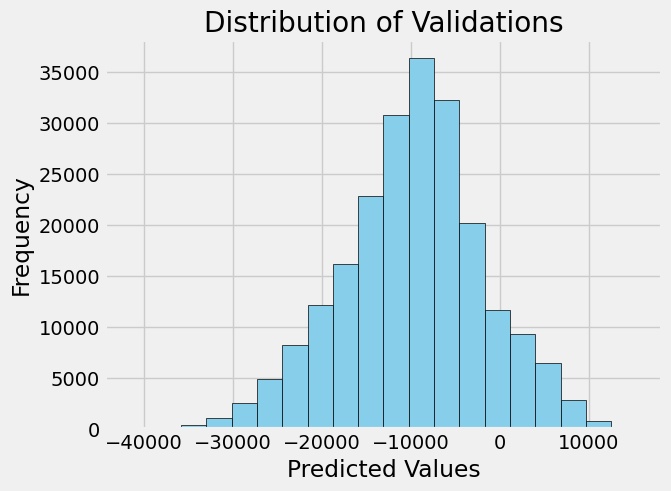

In [90]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(val['Value_NN'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Validations')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [89]:
val = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202312_回測.csv', index_col = 0)
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN
0,Q1777369550,0,90.0365,0,0,0.000933,0.001417,0.000484
1,M1771565510,0,49.1271,0,0,0.000012,0.000019,0.000007
2,R1771843010,0,78.2486,0,0,0.001120,0.001693,0.000573
3,N2729518770,0,73.6882,0,0,0.000019,0.000030,0.000011
4,F1745627350,0,57.3852,0,0,0.000392,0.000599,0.000207
...,...,...,...,...,...,...,...,...
215326,V2795576720,0,69.4419,0,0,0.000647,0.000980,0.000333
215327,B1790155350,0,48.7207,0,0,0.000784,0.001174,0.000391
215328,A1789611970,0,56.3578,0,0,0.000301,0.000460,0.000159
215329,F2755817950,0,93.9032,0,0,0.001053,0.001600,0.000548


In [94]:
#val['Value_NN|T = 0'] = predictions_np
val['Value_NN|T = 1'] = predictions_np
val['Value_NN'] = val['Value_NN|T = 1'] - val['Value_NN|T = 0']
val

,UNINO,換匯發送名單,換匯基因標籤,跨售行為,TOTALNTAMOUNT,Lift_NN|T = 0,Lift_NN|T = 1,Lift_NN,Value_NN|T = 0,Value_NN|T = 1,Value_NN
0,Q1777369550,0,90.0365,0,0,0.000933,0.001417,0.000484,216862.822582,231920.141255,15057.318673
1,M1771565510,0,49.1271,0,0,0.000012,0.000019,0.000007,216128.090563,240544.316393,24416.225830
2,R1771843010,0,78.2486,0,0,0.001120,0.001693,0.000573,212335.683202,232235.262353,19899.579151
3,N2729518770,0,73.6882,0,0,0.000019,0.000030,0.000011,215661.723968,233987.397836,18325.673868
4,F1745627350,0,57.3852,0,0,0.000392,0.000599,0.000207,216446.004857,235745.775506,19299.770649
...,...,...,...,...,...,...,...,...,...,...,...
215326,V2795576720,0,69.4419,0,0,0.000647,0.000980,0.000333,218439.132442,233729.015052,15289.882610
215327,B1790155350,0,48.7207,0,0,0.000784,0.001174,0.000391,214760.687482,231124.639004,16363.951522
215328,A1789611970,0,56.3578,0,0,0.000301,0.000460,0.000159,214894.250833,233386.204880,18491.954047
215329,F2755817950,0,93.9032,0,0,0.001053,0.001600,0.000548,220429.442543,243786.901317,23357.458774


In [95]:
val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202312_回測.csv')

In [96]:
import pandas as pd
import numpy as np
def response_value_by_percentile(true_value, lift_value, treatment, group, bins=10):

    true_value, lift_value, treatment = np.array(true_value), np.array(lift_value), np.array(treatment)
    order = np.argsort(lift_value, kind='mergesort')[::-1]

    trmnt_flag = 1 if group == 'treatment' else 0


    y_true_bin = np.array_split(true_value[order], bins)
    trmnt_bin = np.array_split(treatment[order], bins)
    group_size = np.array([len(y[trmnt == trmnt_flag]) for y, trmnt in zip(y_true_bin, trmnt_bin)])
    response_value = np.array([np.mean(y[trmnt == trmnt_flag]) for y, trmnt in zip(y_true_bin, trmnt_bin)])
    variance = np.array([np.var(y[trmnt == trmnt_flag]) for y, trmnt in zip(y_true_bin, trmnt_bin)])
    #variance = np.multiply(response_value, np.divide((1 - response_value), group_size))

    return response_value, variance, group_size


def uplift_value_by_percentile(true_value, lift_value, treatment, bins=10, string_percentiles=True):
    true_value, lift_value, treatment = np.array(true_value), np.array(lift_value), np.array(treatment)

    response_value_trmnt, variance_trmnt, n_trmnt = response_value_by_percentile(
        true_value, lift_value, treatment, group='treatment', bins=bins)

    response_value_ctrl, variance_ctrl, n_ctrl = response_value_by_percentile(
        true_value, lift_value, treatment, group='control', bins=bins)

    uplift_scores = response_value_trmnt - response_value_ctrl
    uplift_variance = variance_trmnt + variance_ctrl

    percentiles = [round(p * 100 / bins) for p in range(1, bins + 1)]

    if string_percentiles:
        percentiles = [f"0-{percentiles[0]}"] + \
            [f"{percentiles[i]}-{percentiles[i + 1]}" for i in range(len(percentiles) - 1)]


    df = pd.DataFrame({
        'percentile': percentiles,
        'n_treatment': n_trmnt,
        'n_control': n_ctrl,
        'response_value_treatment': response_value_trmnt,
        'response_value_control': response_value_ctrl,
        'uplift': uplift_scores
    })

    std_treatment = np.sqrt(variance_trmnt)
    std_control = np.sqrt(variance_ctrl)
    std_uplift = np.sqrt(uplift_variance)

    df.loc[:, 'std_treatment'] = std_treatment
    df.loc[:, 'std_control'] = std_control
    df.loc[:, 'std_uplift'] = std_uplift

    df = df \
        .set_index('percentile', drop=True, inplace=False) \
        .astype({'n_treatment': 'int32', 'n_control': 'int32'})

    return df

In [ ]:
val['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT']
val['TOTALNTAMOUNT'].describe()

count    2.207480e+05
mean     1.971747e+02
std      9.007271e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.410616e+06
Name: TOTALNTAMOUNT, dtype: float64

In [97]:
uplift_value_by_percentile(
        val["TOTALNTAMOUNT"],
        val['Value_NN'],
        val["換匯發送名單"],
        bins=10
    )

,n_treatment,n_control,response_value_treatment,response_value_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,1467,20067,3096.635310,560.878806,2535.756504,52391.428782,18268.314149,55485.071070
10-20,955,20578,1381.441885,451.939547,929.502338,18872.430105,17345.403505,25632.628442
20-30,832,20701,647.311298,255.503261,391.808037,6657.394613,11659.141150,13425.962736
30-40,757,20776,990.817701,198.124374,792.693327,14634.985505,15918.828458,21623.873386
40-50,717,20816,175.326360,93.090411,82.235949,3521.834540,4997.725440,6113.965824
50-60,689,20844,215.683599,38.747601,176.935998,3870.464664,2344.763333,4525.307924
60-70,764,20769,0.000000,42.716212,-42.716212,0.000000,1959.007918,1959.007918
70-80,715,20818,275.820979,125.983476,149.837503,5046.838154,12287.999627,13284.032151
80-90,561,20972,165.010695,66.790721,98.219974,3904.865751,4861.036440,6235.194609


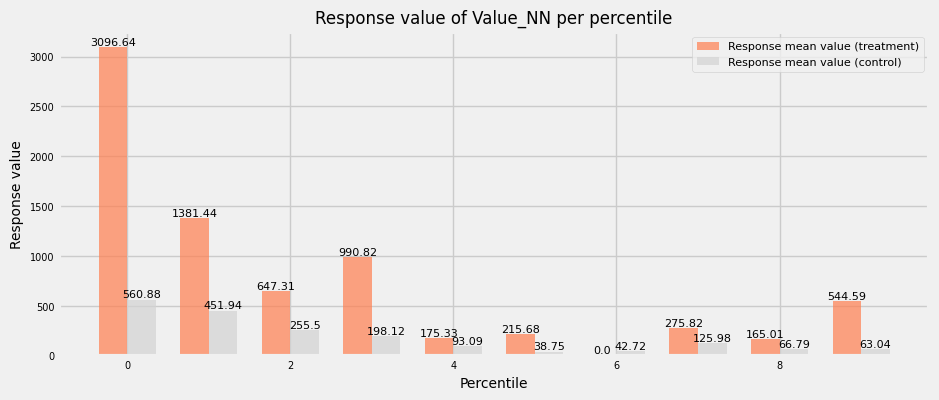

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklift.metrics import uplift_by_percentile

def plot_uplift_value_by_percentile(df, metric_column, bins=10):

    # Fill NaN values in the metric_column with a specific value (e.g., 0)
    df[metric_column].fillna(0, inplace=True)

    uplift_by_perc_df = uplift_value_by_percentile(
        df["TOTALNTAMOUNT"],
        df[metric_column],
        df["換匯發送名單"],
        bins=10
    )
    fig, ax2 = plt.subplots(1, 1, figsize=(10, 4))

    # Plot the second graph (Response Rates for Treatment and Control)
    bar_width = 0.35
    index = np.arange(len(uplift_by_perc_df.index))

    bars2_treatment = ax2.bar(
        index - bar_width/2,
        uplift_by_perc_df.response_value_treatment,
        bar_width,
        label="Response mean value (treatment)",
        color='coral',
        #yerr=uplift_by_perc_df.std_treatment * 2,
        alpha=0.7
    )

    bars2_control = ax2.bar(
        index + bar_width/2,
        uplift_by_perc_df.response_value_control,
        bar_width,
        label="Response mean value (control)",
        color='lightgrey',
        #yerr=uplift_by_perc_df.std_control * 2,
        alpha=0.7
    )

    ax2.set_title(f'Response value of {metric_column} per percentile', fontsize=12)
    ax2.set_xlabel('Percentile', fontsize=10)
    ax2.set_ylabel('Response value', fontsize=10)
    ax2.legend(fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Treatment)
    for bar, label in zip(bars2_treatment, uplift_by_perc_df.response_value_treatment):
        yval = bar.get_height()

        # Check for NaN values before rounding
        if not math.isnan(label):
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{round(label, 2)}', ha='center', va='bottom', fontsize=8)
        else:
            ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.00001, 'NaN', ha='center', va='bottom', fontsize=8)

    # Adding smaller text labels on each bar for Response Rates (Control)
    for bar, label in zip(bars2_control, uplift_by_perc_df.response_value_control):
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, f'{round(label, 2)}', ha='center', va='bottom', fontsize=8)

    # Set smaller font size for tick labels
    ax2.tick_params(axis='both', which='major', labelsize=7)

    # Ensure that the y-axis starts from 0
    ax2.set_ylim(bottom=0)

    plt.show()

# Usage example for 'Uplift_mean' column
plot_uplift_value_by_percentile(val, 'Value_NN')

In [99]:
from causalml.metrics import plot_gain, get_cumgain
T = val
T =T[['換匯發送名單', 'TOTALNTAMOUNT',	'Value_NN']]
#T['Value_NN'] = T['Value_NN']/(max_val - min_val)
cumgain = get_cumgain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=42)
cumgain

,Value_NN,Random
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
215327,0.999977,0.999977
215328,0.999983,0.999983
215329,0.999988,0.999988
215330,0.999994,0.999994


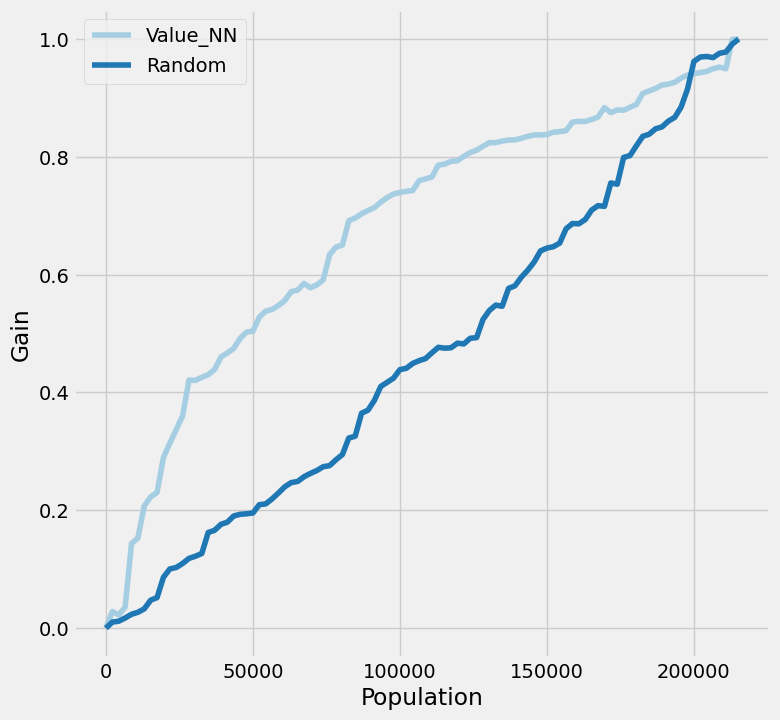

In [100]:
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=True, random_seed=42)

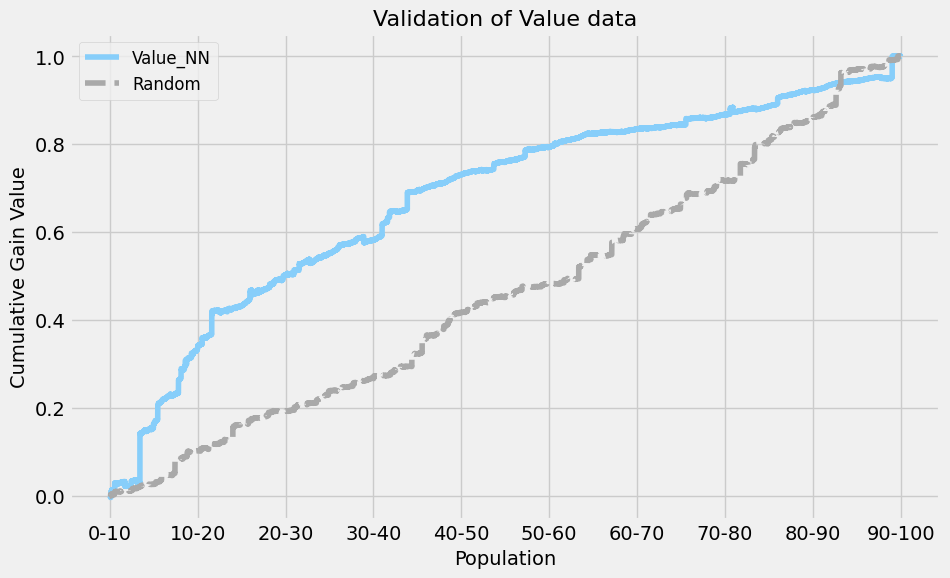

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have already imported pandas as pd and have the necessary dataframes

#df = pd.concat([cumgain, cumgain_1['Gi']], axis=1)
df = cumgain
#df = cumgain[:len(cumgain)//10]
x = df.index

# Define the ranges for the x-axis labels
#ranges = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
ranges = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Resample x to have 11 evenly spaced points
x_resampled = np.linspace(0, len(x) - 1, 10, dtype=int)

# Plotting the lines with customizations
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.plot(x, df['Value_NN'], label='Value_NN', color='lightskyblue')  # Set color and line width
plt.plot(x, df['Random'], label='Random', color='darkgray', linestyle='--')  # Set color and marker

# Adding labels, title, and legend with custom text size
plt.xlabel('Population', fontsize=14)  # Set x-axis label with custom text size
plt.ylabel('Cumulative Gain Value', fontsize=14)  # Set y-axis label with custom text size
plt.title('Validation of Value data', fontsize=16)  # Set title with custom text size
plt.legend(fontsize=12)  # Set legend with custom text size

# Setting x-axis ticks and labels
plt.xticks(x_resampled, ranges)

# Displaying the plot
plt.show()

###Predictions

In [ ]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202403.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv('/content/drive/MyDrive/Sinopac/train_202402.csv')
df = pd.read_csv('/content/data202401.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,F2593340910,18,0,2.0,0,120.0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,F2593358270,19,0,2.0,0,0.0,1,2,0,3,...,0,0,0,0,0,1,0,0,0,0
2,F2593378680,19,0,2.0,0,50.0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0
3,F2593397620,19,0,2.0,0,0.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
4,F2598703540,17,0,2.0,0,0.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,50,0,1.0,0,600.0,1,3,0,1,...,0,0,0,1,0,0,0,1,0,1
1092947,Y2729592620,60,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1092948,Z1222367980,47,0,1.0,0,420.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1092949,Z1222472300,30,0,1.0,0,550.0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [117]:
num_cols = ['年齡', '薪轉員工平均薪資', '全行往來產品數_持有', '全行往來產品數_使用', '基金近1個月申購次數', '基金近3個月申購次數',
       '基金近6個月申購次數', '基金近12個月申購次數', '最近一個月刷卡筆數', '最近三個月刷卡筆數', '最近六個月刷卡筆數',
       '共同行銷合作推廣_證券', '證券月交易筆數', '證券近一年交易筆數', '證券庫存股檔數', 'TOTALNTAMOUNT',
       '外匯交易金額_近三個月']
#df.select_dtypes(include=['int64']).columns[~df.select_dtypes(include=['int64']).columns.isin(binary_columns)] #111

In [140]:
df['TOTALNTAMOUNT'].mean()

258.8280899487198

In [118]:
#1. Minmax
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Exclude non-numeric columns if any
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols = numeric_cols.tolist()  # Convert Index to list

# Concatenate the lists of column names
numeric_cols += num_cols

min_val = df['TOTALNTAMOUNT'].min()
max_val = df['TOTALNTAMOUNT'].max()


# Assuming df is your DataFrame and columns_to_winsorize contains the column names you want to winsorize
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=(0.05, 0.05))

# Initializing MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.drop(['UNINO'], axis = 1, inplace = True)
print(df.shape)

(1092951, 204)


In [120]:
# Load the model
model = CustomNet(input_size)
model.load_state_dict(torch.load('/content/drive/MyDrive/Model/NN_value_202312_回測.pth'))
model.eval()  # Set the model to evaluation mode

CustomNet(
  (fc1_branch1): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch1): ReLU()
  (fc2_branch1): Linear(in_features=128, out_features=1, bias=True)
  (fc1_branch2): Linear(in_features=202, out_features=128, bias=True)
  (bn1_branch2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1_branch2): ReLU()
  (fc2_branch2): Linear(in_features=128, out_features=2, bias=True)
  (fc_output): Linear(in_features=3, out_features=1, bias=True)
  (multiply_theta): MultiplyByTheta()
)

In [125]:
#T1 = pi01
#Treatment = 1
df.iloc[:, 149] = 1
df.iloc[:, 149]

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1092946    1.0
1092947    1.0
1092948    1.0
1092949    1.0
1092950    1.0
Name: 換匯發送名單, Length: 1092951, dtype: float64

In [126]:
#202402
df = df.astype(float)
X_pred = torch.tensor(df.drop(['TOTALNTAMOUNT','跨售行為'],axis=1).values)  # Exclude the last column
y_pred = torch.tensor(df['TOTALNTAMOUNT'].values)  # Last column as the target variable

# Define the loss function: Mean Squared Error (MSE)
criterion = nn.MSELoss()

# Set model to evaluation mode
model.eval()

# Pass test data through the model
with torch.no_grad():
    predictions = model(X_pred.float())

# Convert predictions to numpy array for further processing if needed
predictions_np = predictions.cpu().numpy()

# Print predictions
print("Predictions:", predictions_np)

# Compute the loss if needed
loss_test = criterion(predictions.squeeze(), y_pred.float())
print("Test Loss:", loss_test.item())

Predictions: [[0.07158072]
 [0.07254346]
 [0.07212536]
 ...
 [0.07227896]
 [0.07209974]
 [0.07088869]]
Test Loss: 0.005211967043578625


In [127]:
#predictions_np_0 = predictions_np
predictions_np_0.mean()
predictions_np_1 = predictions_np
predictions_np_1.mean()

0.072187126

In [128]:
# Define the min and max values for each feature
#min_val = df['TOTALNTAMOUNT'].min()
#max_val = df['TOTALNTAMOUNT'].max()

# Apply the inverse transform manually
predictions_np_0 = (predictions_np_0 * (max_val - min_val)) + min_val
predictions_np_1 = (predictions_np_1 * (max_val - min_val)) + min_val

In [ ]:
import numpy as np

# Assuming predictions_np is your NumPy array
mean = np.mean(predictions_np)
median = np.median(predictions_np)
std_dev = np.std(predictions_np)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

Mean: 203659.57044824513
Median: 203028.7547633052
Standard Deviation: 1467.1826888799164


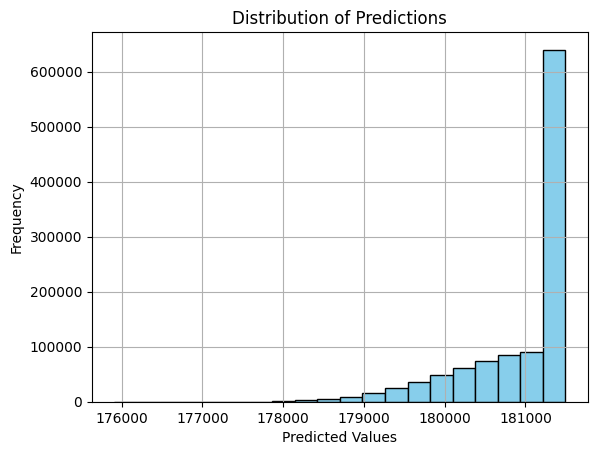

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions_np is your NumPy array
plt.hist(predictions_np, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [129]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift
0,F2593340910,75.7095,0,0,0,0.006040,0.008983,0.002943
1,F2593358270,84.0338,0,0,0,0.000226,0.000347,0.000121
2,F2593378680,73.1411,0,0,0,0.000094,0.000144,0.000051
3,F2593397620,72.0423,0,0,0,0.000685,0.001041,0.000356
4,F2598703540,75.5019,0,0,0,0.001656,0.002481,0.000825
...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.1841,0,0,0,0.007956,0.011932,0.003976
1092947,Y2729592620,96.3283,0,0,0,0.006426,0.009671,0.003245
1092948,Z1222367980,82.3242,0,0,0,0.001709,0.002579,0.000870
1092949,Z1222472300,89.6383,0,0,0,0.001262,0.001902,0.000640


In [130]:
import pandas as pd
#res = pd.read_csv('/content/data202402.csv', usecols=['UNINO', '換匯基因標籤', '換匯發送名單','TOTALNTAMOUNT', '跨售行為'])
res['NN_value_T=0'] = predictions_np_0
res['NN_value_T=1'] = predictions_np_1
res['NN_value'] = res['NN_value_T=1'] - res['NN_value_T=0']
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F2593340910,75.7095,0,0,0,0.006040,0.008983,0.002943,213429.625531,228299.533944,14869.908413
1,F2593358270,84.0338,0,0,0,0.000226,0.000347,0.000121,216054.164532,231370.102236,15315.937704
2,F2593378680,73.1411,0,0,0,0.000094,0.000144,0.000051,212494.983865,230036.624363,17541.640498
3,F2593397620,72.0423,0,0,0,0.000685,0.001041,0.000356,213165.097131,228696.017626,15530.920495
4,F2598703540,75.5019,0,0,0,0.001656,0.002481,0.000825,212056.962666,227154.662064,15097.699398
...,...,...,...,...,...,...,...,...,...,...,...
1092946,Z1222305990,98.1841,0,0,0,0.007956,0.011932,0.003976,210254.571848,226895.313972,16640.742125
1092947,Y2729592620,96.3283,0,0,0,0.006426,0.009671,0.003245,214139.589149,232535.433957,18395.844808
1092948,Z1222367980,82.3242,0,0,0,0.001709,0.002579,0.000870,215396.621831,230526.519933,15129.898103
1092949,Z1222472300,89.6383,0,0,0,0.001262,0.001902,0.000640,214533.411388,229954.903813,15421.492425


In [131]:
# Import pandas
import pandas as pd

# Set the display option to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
res.iloc[:,5:].describe()

,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
count,1092951.00000,1092951.00000,1092951.00000,1092951.00000,1092951.00000,1092951.00000
mean,0.00139,0.00208,0.00070,213057.08031,230233.64114,17176.56083
std,0.00245,0.00365,0.00120,2186.12864,3166.20246,2674.15061
min,0.00000,0.00001,0.00000,200254.43832,217857.38705,12862.03996
25%,0.00034,0.00052,0.00018,211573.64941,228105.89022,15182.29526
50%,0.00078,0.00119,0.00040,213087.74895,229635.67326,16178.05505
75%,0.00135,0.00204,0.00069,214507.22469,231905.39679,18504.80950
max,0.05812,0.08381,0.02569,223074.67032,250429.50175,31742.90894


In [132]:
#res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv')
#1103740 rows × 6 columns
#res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202402_回測.csv')
#1103740 rows × 11 columns
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202401_回測.csv')
#1092951 rows × 11 columns

In [ ]:
output = res.drop(['UNINO'], axis = 1)
output.to_csv('/content/output.csv')

In [207]:
import pandas as pd
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202402_回測.csv', index_col = 0)
res

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F1706395290,87.94830,0,0,0,0.00197,0.00249,0.00052,428311.28094,560129.35883,131818.07789
1,F1706405550,59.23820,0,0,0,0.00128,0.00162,0.00034,293055.58105,494438.69632,201383.11526
2,F1713360850,50.70720,0,0,0,0.00010,0.00013,0.00003,259445.09410,431254.59438,171809.50028
3,F1706408440,98.37470,0,0,0,0.03451,0.04191,0.00740,165877.20137,213151.28398,47274.08262
4,F1713368440,79.39790,0,0,0,0.00237,0.00299,0.00062,442410.00897,580413.44463,138003.43566
...,...,...,...,...,...,...,...,...,...,...,...
1103735,X2721994820,62.47770,0,0,0,0.00035,0.00044,0.00009,339898.62913,550905.28297,211006.65384
1103736,Y1221175610,45.02200,0,0,0,0.00014,0.00017,0.00004,183963.03150,253809.66346,69846.63196
1103737,W1223779390,78.42040,0,0,0,0.00214,0.00270,0.00056,484899.64729,685054.16230,200154.51502
1103738,X2725567450,83.98490,0,0,0,0.00106,0.00135,0.00028,399269.00390,526284.62572,127015.62182


##回測

In [208]:
value = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/4月外匯購買名單.csv')
value = value[['CUSTID', 'TOTALNTAMOUNT']]
value = value.groupby('CUSTID').sum()
value.reset_index(inplace = True)
value = value.rename(columns={"CUSTID": "UNINO"})
value

,UNINO,TOTALNTAMOUNT
0,020880380,485723
1,045720430,45769
2,047662180,35814
3,054324090,488145
4,106477250,18468
...,...,...
24182,Z2222349690,40469
24183,Z2222388970,131399
24184,Z2222443520,2110
24185,Z2229524240,21100


In [209]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
cols = list(df.columns[:7]) + list(df.columns[-7:])
# Select the columns from the DataFrame
df = df[df['Round']==5][cols]
df

<ipython-input-209-447d193a93e6>:1: DtypeWarning: Columns (162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')


,UNINO,Round,S,L,V,Actual T,Planned T,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
430299,A1422226000,5,1,0,0,0,0,0.00287,0.00272,0.00015,352405.05696,348656.96938,3748.08758,0.00000
430300,A1422913740,5,0,1,0,1,1,0.00365,0.00339,0.00027,352004.32764,348114.75359,3889.57404,0.00000
430301,A1520637810,5,1,1,0,0,0,0.00334,0.00312,0.00023,352273.03272,347546.72156,4726.31116,0.00000
430302,A1520664910,5,0,1,0,0,0,0.00307,0.00289,0.00018,350758.55381,346987.51845,3771.03535,0.00000
430303,A1520665440,5,1,0,0,0,0,0.00258,0.00250,0.00008,352095.29919,347820.71655,4274.58264,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502986,Y2729801280,5,1,0,0,1,1,0.00256,0.00251,0.00006,350404.42785,346199.95515,4204.47271,0.00000
502987,Z1222922330,5,1,0,0,0,1,0.00259,0.00251,0.00008,350292.25941,345244.75384,5047.50557,0.00000
502988,Z1229018770,5,1,0,0,1,1,0.00264,0.00253,0.00010,351640.96297,347783.87344,3857.08953,0.00000
502989,Z1229916990,5,1,0,0,0,0,0.00258,0.00250,0.00008,352532.05205,348892.14686,3639.90519,0.00000


In [210]:
S = df[df['S']==1].UNINO

cutoff = res['NN_lift'].quantile(0.90)
cutoff_1 = res['NN_value'].quantile(0.90)

# Filter the DataFrame to get rows where the column's value is greater than or equal to the cutoff
L = res[(res['NN_value'] >= cutoff_1)].UNINO
V =  res[res['NN_lift'] >= cutoff].UNINO

In [211]:
cutoff = res['NN_lift'].quantile(0.90)
cutoff_1 = res['NN_value'].quantile(0.90)

# Filter the DataFrame to get rows where the column's value is greater than or equal to the cutoff
top_10_percent = res[(res['NN_value'] >= cutoff_1) | (res['NN_lift'] >= cutoff) | (res.UNINO.isin(S))]
top_10_percent.reset_index(inplace = True, drop = True)
top_10_percent
#25620

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F1706408440,98.37470,0,0,0,0.03451,0.04191,0.00740,165877.20137,213151.28398,47274.08262
1,F1707312750,93.57600,1,0,0,0.00462,0.00584,0.00123,298362.68337,392329.61041,93966.92705
2,F1714862860,85.81420,0,0,0,0.00784,0.00987,0.00203,312187.36052,401413.65267,89226.29215
3,F1707356860,92.55180,0,0,0,0.00495,0.00624,0.00129,293206.28761,378791.27759,85584.98997
4,F1714881890,68.74850,0,0,0,0.00500,0.00630,0.00130,427490.45081,586115.96773,158625.51692
...,...,...,...,...,...,...,...,...,...,...,...
256255,V2799001950,92.49460,0,0,0,0.00223,0.00281,0.00058,324589.85279,413678.08574,89088.23294
256256,V1227661610,70.48070,0,0,0,0.00505,0.00638,0.00133,316128.49256,389870.02573,73741.53317
256257,W1227866610,83.94850,0,0,0,0.00195,0.00246,0.00051,362691.77145,577610.23931,214918.46786
256258,X1723818330,54.82890,0,0,0,0.00033,0.00042,0.00009,316475.76399,563914.69929,247438.93531


In [212]:
top_10_percent = pd.merge(left= top_10_percent,right= value,how="outer")
top_10_percent = top_10_percent.fillna(0)
top_10_percent

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F1706408440,98.37470,0.00000,0,0.00000,0.03451,0.04191,0.00740,165877.20137,213151.28398,47274.08262
1,F1707312750,93.57600,1.00000,0,0.00000,0.00462,0.00584,0.00123,298362.68337,392329.61041,93966.92705
2,F1714862860,85.81420,0.00000,0,0.00000,0.00784,0.00987,0.00203,312187.36052,401413.65267,89226.29215
3,F1707356860,92.55180,0.00000,0,0.00000,0.00495,0.00624,0.00129,293206.28761,378791.27759,85584.98997
4,F1714881890,68.74850,0.00000,0,0.00000,0.00500,0.00630,0.00130,427490.45081,586115.96773,158625.51692
...,...,...,...,...,...,...,...,...,...,...,...
280411,Z2222349690,0.00000,0.00000,40469,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280412,Z2222388970,0.00000,0.00000,131399,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280413,Z2222443520,0.00000,0.00000,2110,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280414,Z2229524240,0.00000,0.00000,21100,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [213]:
top_10_percent['跨售行為'] = top_10_percent['TOTALNTAMOUNT'].apply(lambda x: 0 if x == 0 else 1)
top_10_percent

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value
0,F1706408440,98.37470,0.00000,0,0,0.03451,0.04191,0.00740,165877.20137,213151.28398,47274.08262
1,F1707312750,93.57600,1.00000,0,0,0.00462,0.00584,0.00123,298362.68337,392329.61041,93966.92705
2,F1714862860,85.81420,0.00000,0,0,0.00784,0.00987,0.00203,312187.36052,401413.65267,89226.29215
3,F1707356860,92.55180,0.00000,0,0,0.00495,0.00624,0.00129,293206.28761,378791.27759,85584.98997
4,F1714881890,68.74850,0.00000,0,0,0.00500,0.00630,0.00130,427490.45081,586115.96773,158625.51692
...,...,...,...,...,...,...,...,...,...,...,...
280411,Z2222349690,0.00000,0.00000,40469,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280412,Z2222388970,0.00000,0.00000,131399,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280413,Z2222443520,0.00000,0.00000,2110,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
280414,Z2229524240,0.00000,0.00000,21100,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [214]:
setA1 = set(S)
setC1 = set(L)
setB1 = set(V)


setSLV = setA1 & setC1 & setB1
setSL = setA1 & setC1 - setSLV
setLV = setC1 & setB1 - setSLV
setSV = setA1 & setB1 - setSLV
setS = setA1-setSL-setSV-setSLV
setL = setC1-setSL-setLV-setSLV
setV = setB1-setSV-setLV-setSLV

print("Length of S: ", len(setS)) #6021
print("Length of L: ", len(setL)) #45036
print("Length of V: ", len(setV)) #40925
print("Length of SL: ", len(setSL)) #1629
print("Length of LV: ", len(setLV)) #4516
print("Length of SV: ", len(setSV)) #5745
print("Length of common namelist(SLV): ", len(setSLV)) #1541

Length of S:  35876
Length of L:  109569
Length of V:  80551
Length of SL:  441
Length of LV:  361
Length of SV:  29459
Length of common namelist(SLV):  3


In [215]:
for index, row in top_10_percent.iterrows():
    unino = row['UNINO']

    if unino in setSLV:
        top_10_percent.at[index, 'TAG'] = 'SLV'
    elif unino in setSL:
        top_10_percent.at[index, 'TAG'] = 'SL'
    elif unino in setLV:
        top_10_percent.at[index, 'TAG'] = 'LV'
    elif unino in setSV:
        top_10_percent.at[index, 'TAG'] = 'SV'
    elif unino in setS:
        top_10_percent.at[index, 'TAG'] = 'S'
    elif unino in setL:
        top_10_percent.at[index, 'TAG'] = 'L'
    elif unino in setV:
        top_10_percent.at[index, 'TAG'] = 'V'
    else:
        top_10_percent.at[index, 'TAG'] = 0

In [216]:
top_10_percent

,UNINO,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,NN_lift_T=0,NN_lift_T=1,NN_lift,NN_value_T=0,NN_value_T=1,NN_value,TAG
0,F1706408440,98.37470,0.00000,0,0,0.03451,0.04191,0.00740,165877.20137,213151.28398,47274.08262,SV
1,F1707312750,93.57600,1.00000,0,0,0.00462,0.00584,0.00123,298362.68337,392329.61041,93966.92705,SV
2,F1714862860,85.81420,0.00000,0,0,0.00784,0.00987,0.00203,312187.36052,401413.65267,89226.29215,SV
3,F1707356860,92.55180,0.00000,0,0,0.00495,0.00624,0.00129,293206.28761,378791.27759,85584.98997,SV
4,F1714881890,68.74850,0.00000,0,0,0.00500,0.00630,0.00130,427490.45081,586115.96773,158625.51692,V
...,...,...,...,...,...,...,...,...,...,...,...,...
280411,Z2222349690,0.00000,0.00000,40469,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
280412,Z2222388970,0.00000,0.00000,131399,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
280413,Z2222443520,0.00000,0.00000,2110,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,SV
280414,Z2229524240,0.00000,0.00000,21100,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,V


In [217]:
top_10_percent.pivot_table(index=['TAG', '換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT',aggfunc=['sum', 'mean', 'max', 'min', 'count'])

sum                     mean                  max  \
跨售行為              0                1       0            1       0   
TAG 換匯發送名單                                                          
0   0.00000     NaN 2423082273.00000     NaN 120767.65715     NaN   
L   0.00000 0.00000    5911734.00000 0.00000  84453.34286 0.00000   
    1.00000 0.00000     427439.00000 0.00000 427439.00000 0.00000   
LV  0.00000 0.00000      22280.00000 0.00000  22280.00000 0.00000   
S   0.00000 0.00000   23563179.00000 0.00000  96176.24082 0.00000   
    1.00000 0.00000    9261762.00000 0.00000 165388.60714 0.00000   
SL  0.00000 0.00000     800000.00000 0.00000 800000.00000 0.00000   
    1.00000 0.00000              NaN 0.00000          NaN 0.00000   
SLV 0.00000 0.00000              NaN 0.00000          NaN 0.00000   
SV  0.00000 0.00000  230538351.00000 0.00000 104981.03415 0.00000   
    1.00000 0.00000   36729241.00000 0.00000  87242.85273 0.00000   
V   0.00000 0.00000  437904698.00000 0.00000 125151.38554 0.00000   
    1.00000 0.00000    1002336.00000 0.00000  24447.21951 0.00000   

                               min                     count              
跨售行為                     1       0            1            0           1  
TAG 換匯發送名單                                                                
0   0.00000 10425577.00000     NaN    100.00000          NaN 20064.00000  
L   0.00000  1940000.00000 0.00000    394.00000 109285.00000    70.00000  
    1.00000   427439.00000 0.00000 427439.00000    258.00000     1.00000  
LV  0.00000    22280.00000 0.00000  22280.00000    360.00000     1.00000  
S   0.00000  2403321.00000 0.00000    200.00000  20601.00000   245.00000  
    1.00000  2277000.00000 0.00000    321.00000  15162.00000    56.00000  
SL  0.00000   800000.00000 0.00000 800000.00000    396.00000     1.00000  
    1.00000            NaN 0.00000          NaN     44.00000         NaN  
SLV 0.00000            NaN 0.00000          NaN      3.00000         NaN  
SV  0.00000  5351445.00000 0.00000    100.00000  15673.00000  2196.00000  
    1.00000  1984375.00000 0.00000    100.00000  12813.00000   421.00000  
V   0.00000  4999998.00000 0.00000    100.00000  76194.00000  3499.00000  
    1.00000   246000.00000 0.00000    539.00000   3032.00000    41.00000